Saving 1. Predict Loan Default.csv to 1. Predict Loan Default (4).csv
Dataset loaded successfully!
Shape: (255347, 18)
Missing values:
 LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


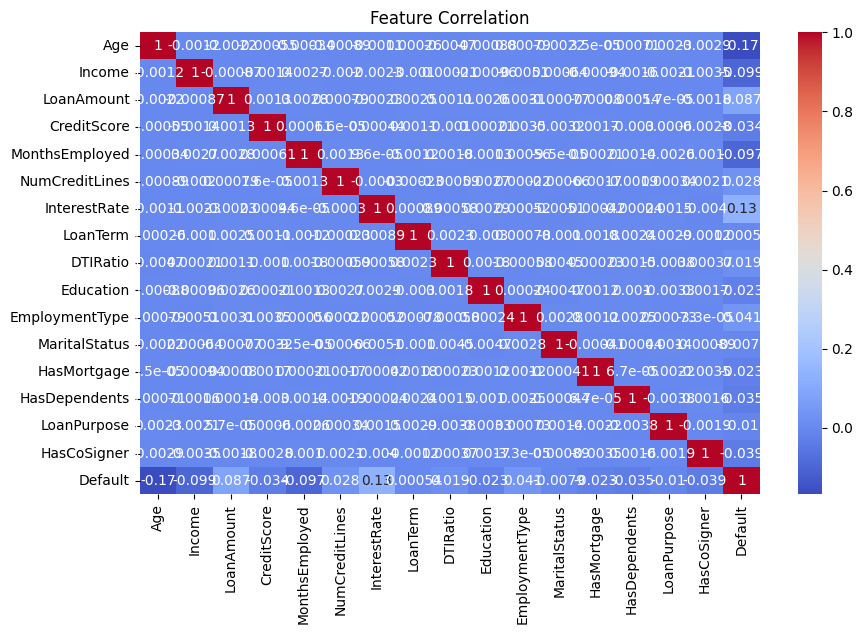

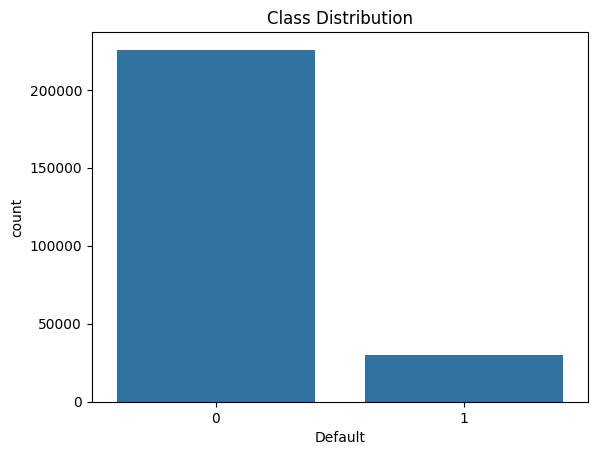

In [10]:
# 📌 STEP 1: Upload File from Your System
from google.colab import files
uploaded = files.upload()

# 📌 STEP 2: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 📌 STEP 3: Load the Dataset
df = pd.read_csv("1. Predict Loan Default.csv")
print("Dataset loaded successfully!")
df.head()

# 📌 STEP 4: Basic Info and Cleanup
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())

# Drop LoanID (not useful for prediction)
df.drop("LoanID", axis=1, inplace=True)

# 📌 STEP 5: Encode Categorical Columns
cat_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

df.head()

# 📌 STEP 6: Data Visualization (EDA)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

sns.countplot(x="Default", data=df)
plt.title("Class Distribution")
plt.show()

# 📌 STEP 7: Split Data into Features and Target
X = df.drop("Default", axis=1)
y = df["Default"]

# Train
